# Music Classification using Neural Networks
by: Team 22
***
This notebook will serve as the 'main' training & classification point of network. It will be kept as easy-to-read as possible by importing necessary pre-processing, data loaders, and other helper functions that do not need to be tuned with the network.

In [10]:
# import libraries
import torch
import matplotlib.pyplot as plt
import librosa
import librosa.display

# files and networks made by us
from DataProcessing import SplitTVT as tvt
from Networks import CRNN as nets
from Networks import Helpers as hp

In [2]:
pathSets = ["Data/trainSet.pkl", "Data/valSet.pkl", "Data/testSet.pkl"]  # path to datasets

In [3]:
# hyperparameters
bs = 128  # batch size
lr = 0.0003  # learning rate
epo = 50  # epochs
momentum = 0.1  # momentum (IF USING train_sgd)

# hyperparameters for rnn
hidden_size = 70
num_layers = 2

trainLoader, valLoader, testLoader = tvt.load_data(pathSets[0], pathSets[1], pathSets[2], bs)
net = nets.CRNN1("crnn_1", hiddenSize=hidden_size, numLayers=num_layers)

hp.train_sgd(net, trainLoader, valLoader, lr, momentum, bs, epo, save=False)

Training Started...
Epoch 1: Train acc: 0.16666666666666666, Train loss: 1.7936613321304322 | Validation acc: 0.16666666666666666, Validation loss: 1.7972170114517212
Epoch 2: Train acc: 0.16666666666666666, Train loss: 1.7855803549289704 | Validation acc: 0.16666666666666666, Validation loss: 1.7862397670745849
Epoch 3: Train acc: 0.16666666666666666, Train loss: 1.7778577208518982 | Validation acc: 0.16666666666666666, Validation loss: 1.7768938064575195
Epoch 4: Train acc: 0.16666666666666666, Train loss: 1.771928256750107 | Validation acc: 0.16666666666666666, Validation loss: 1.7743406295776367
Epoch 5: Train acc: 0.16666666666666666, Train loss: 1.7666492640972138 | Validation acc: 0.16666666666666666, Validation loss: 1.7695664167404175
Epoch 6: Train acc: 0.16666666666666666, Train loss: 1.7620037019252777 | Validation acc: 0.16666666666666666, Validation loss: 1.7632745265960694
Epoch 7: Train acc: 0.16666666666666666, Train loss: 1.7585249900817872 | Validation acc: 0.1666666

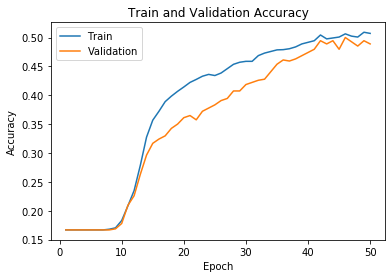

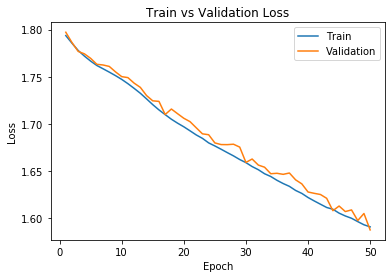

In [4]:
name = hp.get_model_name(net.name, bs, lr, epo)
hp.plot_training_curve(name)

In [5]:
# hyperparameters
bs = 128  # batch size
lr = 0.0003  # learning rate
epo = 50  # epochs
momentum = 0.01  # momentum (IF USING train_sgd)

# hyperparameters for rnn
hidden_size = 70
num_layers = 2

trainLoader, valLoader, testLoader = tvt.load_data(pathSets[0], pathSets[1], pathSets[2], bs)
net = nets.CRNN1("crnn_2", hiddenSize=hidden_size, numLayers=num_layers)

hp.train_sgd(net, trainLoader, valLoader, lr, momentum, bs, epo, save=False)

Training Started...
Epoch 1: Train acc: 0.16666666666666666, Train loss: 1.8005305409431458 | Validation acc: 0.16666666666666666, Validation loss: 1.796592116355896
Epoch 2: Train acc: 0.16666666666666666, Train loss: 1.790007334947586 | Validation acc: 0.16666666666666666, Validation loss: 1.7921457529067992
Epoch 3: Train acc: 0.16666666666666666, Train loss: 1.7808892190456391 | Validation acc: 0.16666666666666666, Validation loss: 1.7863592624664306
Epoch 4: Train acc: 0.16666666666666666, Train loss: 1.7730921030044555 | Validation acc: 0.16666666666666666, Validation loss: 1.7763436555862426
Epoch 5: Train acc: 0.16587301587301587, Train loss: 1.7653029024600984 | Validation acc: 0.16296296296296298, Validation loss: 1.770607590675354
Epoch 6: Train acc: 0.15515873015873016, Train loss: 1.7587359368801116 | Validation acc: 0.15555555555555556, Validation loss: 1.7609938144683839
Epoch 7: Train acc: 0.1361111111111111, Train loss: 1.7529566407203674 | Validation acc: 0.1407407407

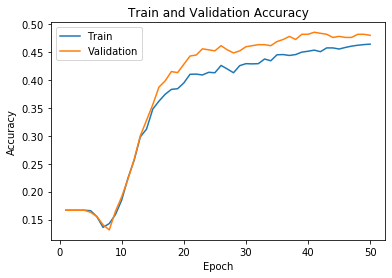

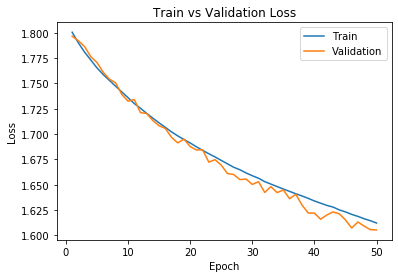

In [6]:
name = hp.get_model_name(net.name, bs, lr, epo)
hp.plot_training_curve(name)

In [8]:
# hyperparameters
bs = 128  # batch size
lr = 0.0003  # learning rate
epo = 50  # epochs
momentum = 0.5  # momentum (IF USING train_sgd)

# hyperparameters for rnn
hidden_size = 70
num_layers = 2

trainLoader, valLoader, testLoader = tvt.load_data(pathSets[0], pathSets[1], pathSets[2], bs)
net = nets.CRNN1("crnn_3", hiddenSize=hidden_size, numLayers=num_layers)

hp.train_sgd(net, trainLoader, valLoader, lr, momentum, bs, epo, save=False)

Training Started...
Epoch 1: Train acc: 0.25833333333333336, Train loss: 1.782162880897522 | Validation acc: 0.2574074074074074, Validation loss: 1.7776829242706298
Epoch 2: Train acc: 0.2515873015873016, Train loss: 1.7688365876674652 | Validation acc: 0.24444444444444444, Validation loss: 1.7685863971710205
Epoch 3: Train acc: 0.24444444444444444, Train loss: 1.7606724679470063 | Validation acc: 0.2351851851851852, Validation loss: 1.7578537940979004
Epoch 4: Train acc: 0.24563492063492062, Train loss: 1.7547765910625457 | Validation acc: 0.23333333333333334, Validation loss: 1.7570671319961548
Epoch 5: Train acc: 0.25912698412698415, Train loss: 1.749594259262085 | Validation acc: 0.24074074074074073, Validation loss: 1.7479841232299804
Epoch 6: Train acc: 0.2761904761904762, Train loss: 1.7455385029315948 | Validation acc: 0.2574074074074074, Validation loss: 1.7455204963684081
Epoch 7: Train acc: 0.2988095238095238, Train loss: 1.7416492521762847 | Validation acc: 0.27407407407407

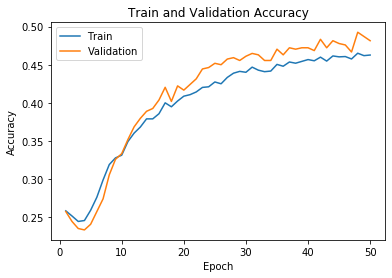

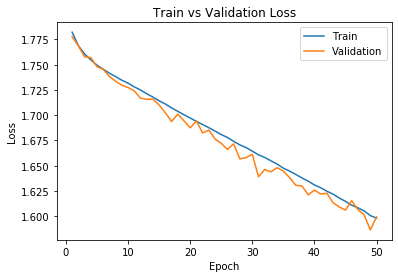

In [9]:
name = hp.get_model_name(net.name, bs, lr, epo)
hp.plot_training_curve(name)

bs=128, lr = 0.003, epo = 50, hs = 10, nl = 1, crnn2 = 74.8%

    - v2: bs = 64, val = 76.1%

    - v3: bs = 129, hs = 20, val = 77.9%

    - v4: hs = 40, val = 81.4%


hyperparameters: 
bs = 128  # batch size
lr = 0.0003  # learning rate
epo = 50  # epochs

hyperparameters for rnn:
hidden_size = 60
num_layers = 2

trainLoader, valLoader, testLoader = tvt.load_data(pathSets[0], pathSets[1], pathSets[2], bs)

net = nets.CRNN3("crnn_3", hiddenSize=hidden_size, numLayers=num_layers)

hp.train(net, trainLoader, valLoader, lr, bs, epo, save=False)

88%



In [ ]:
sample = 